# Compound Events
https://github.com/e-baumer/standard_precip
https://github.com/e-baumer/standard_precip/blob/master/standard_precip/base_sp.py

In [1]:
from process import *

event = ['CWHE','CDHE'][1]
months = [6, 7, 8]
center='LARC'

ssp_dfs, hist, comp, results, pr, tm = main(center, event, months)

In [8]:
import pandas as pd
import numpy as np
from standard_precip.spi import SPI

daily = pd.read_csv('../compound/LARC_pr_ssp126_daily.csv').rename(columns={'Unnamed: 0': 'date'})
monthly = pd.read_csv('../compound/LARC_pr_ssp126_monthly_avg.csv').rename(columns={'Unnamed: 0': 'date'})

col = 'INM-CM4-8'

daily_ = SPI().calculate(daily, 'date', col, freq='D', scale=30, 
                       fit_type='lmom', dist_type='gam').dropna()
monthly_ = SPI().calculate(monthly, 'date', col, freq='M', scale=1, 
                       fit_type='lmom', dist_type='gam')#.dropna()
print('daily spi')
display(daily_.head(10).iloc[:, [0,2]])
print('\nmonthly spi')
display(monthly_.head(10).iloc[:, [0,2]])

daily spi


,date,INM-CM4-8_scale_30_calculated_index
29,2015-01-30,-0.831364
30,2015-01-31,-0.506899
31,2015-02-01,-0.281658
32,2015-02-02,-0.270403
33,2015-02-03,-0.293022
34,2015-02-04,-0.144382
35,2015-02-05,-0.438949
36,2015-02-06,-0.486411
37,2015-02-07,-0.475809
38,2015-02-08,-0.085682



monthly spi


,date,INM-CM4-8_calculated_index
0,2015-01-31,-0.556313
1,2015-02-28,0.305840
2,2015-03-31,1.136012
3,2015-04-30,-1.511246
4,2015-05-31,-0.890870
5,2015-06-30,-1.176441
6,2015-07-31,0.180939
7,2015-08-31,0.614022
8,2015-09-30,-0.380548
9,2015-10-31,-1.024563


In [9]:
daily_.iloc[2:30]#.mean()

,date,INM-CM4-8_scale_30,INM-CM4-8_scale_30_calculated_index
31,2015-02-01,0.000895,-0.281658
32,2015-02-02,0.000897,-0.270403
33,2015-02-03,0.000899,-0.293022
34,2015-02-04,0.000950,-0.144382
35,2015-02-05,0.000835,-0.438949
36,2015-02-06,0.000810,-0.486411
37,2015-02-07,0.000831,-0.475809
38,2015-02-08,0.000977,-0.085682
39,2015-02-09,0.001140,0.286914
40,2015-02-10,0.001168,0.358501


In [16]:
# 1 month SPI using Gamma and L-moments
for col in df.columns[1:]:
    print(col)
    spi = SPI().calculate(df, 'date', col, freq='D', scale=12, 
                                 fit_type='lmom', dist_type='gam')

INM-CM4-8
INM-CM5-0
NorESM2-MM
NorESM2-LM
MIROC6
GFDL-ESM4
MIROC-ES2L
GISS-E2-1-G
FGOALS-g3
MPI-ESM1-2-HR
BCC-CSM2-MR
MPI-ESM1-2-LR
MRI-ESM2-0
CMCC-ESM2
ACCESS-ESM1-5
EC-Earth3
ACCESS-CM2
IPSL-CM6A-LR
CNRM-ESM2-1
CNRM-CM6-1
KACE-1-0-G


ZeroDivisionError: division by zero

In [8]:
from standard_precip.utils import plot_index


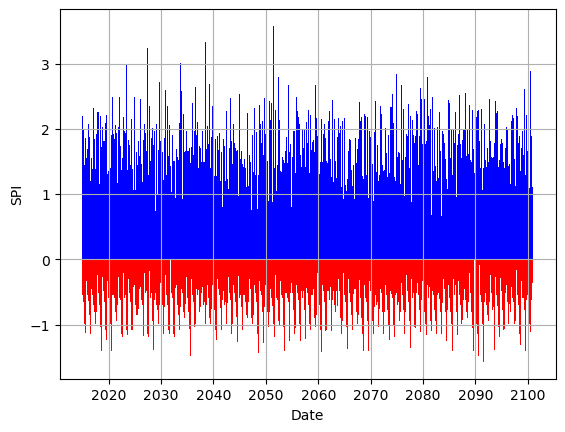

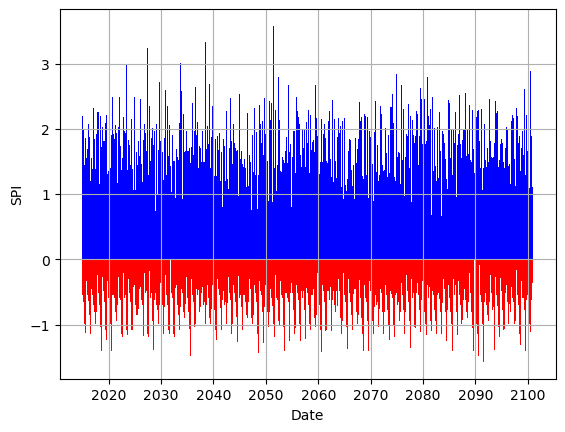

In [12]:
plot_index(spi, 'date', 'INM-CM4-8_calculated_index')


In [ ]:
spi_calculator = SPI(df, scale=1)

# Calculate SPI values
spi_values = spi_calculator.calculate()

# Display the calculated SPI values
print(spi_values.head())


In [11]:
spi

,date,INM-CM4-8,INM-CM4-8_calculated_index
0,2015-01-01,0.000000e+00,-0.357216
1,2015-01-02,0.000000e+00,-0.265405
2,2015-01-03,0.000000e+00,-0.484675
3,2015-01-04,6.062806e-10,-0.483938
4,2015-01-05,1.348726e-05,0.235993
...,...,...,...
31406,2100-12-27,0.000000e+00,-0.452147
31407,2100-12-28,4.865987e-05,0.734032
31408,2100-12-29,7.020033e-05,0.767605
31409,2100-12-30,0.000000e+00,-0.388462


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import gamma, norm

df = pd.read_csv('../compound/LARC_pr_ssp126_daily.csv').rename(columns={'Unnamed: 0': 'date'})
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
# df *= 86400

def compute_spi(series):
    '''
    Compute Standardized Precipitation Index (SPI)
    Fit Gamma Distribution and Transform to Gaussian
    '''
    # Fit gamma distribution to positive precipitation values
    shape, loc, scale = gamma.fit(series[series > 0], floc=0)  # Force location parameter to 0
    
    # Compute cumulative probabilities using the fitted gamma distribution
    cdf = gamma.cdf(series, shape, loc=loc, scale=scale)
    
    # Handle zero precipitation values (assign a small probability close to 0)
    cdf[series == 0] = 1e-10
    
    # Transform cumulative probabilities to standard normal distribution
    spi_values = norm.ppf(cdf)
    
    return spi_values

# Step 3: Standardize Using Mean and Standard Deviation (Optional)
# If needed, calculate SPI based on standardized anomalies
def standardize_spi(series):
    '''
    Standardize SPI values using mean and standard deviation.
    '''
    mean_precip = series.mean()
    std_precip = series.std()
    spi_values = (series - mean_precip) / std_precip
    return spi_values

spi_df = df.apply(compute_spi, axis=0)
standardized_spi_df = spi_df.apply(standardize_spi, axis=0)

# Resulting DataFrame `spi_df` contains SPI values for each model and date.



In [8]:
standardized_spi_df

,INM-CM4-8,INM-CM5-0,NorESM2-MM,NorESM2-LM,MIROC6,GFDL-ESM4,MIROC-ES2L,GISS-E2-1-G,FGOALS-g3,MPI-ESM1-2-HR,...,MRI-ESM2-0,CMCC-ESM2,ACCESS-ESM1-5,EC-Earth3,ACCESS-CM2,IPSL-CM6A-LR,CNRM-ESM2-1,CNRM-CM6-1,KACE-1-0-G,CESM2
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,-1.481756,-1.531116,-1.142382,0.074899,0.656023,-1.311668,0.922027,0.043877,-1.933393,-1.201576,...,0.184704,1.486443,0.466025,-1.082245,-1.748325,0.323166,-1.307639,1.309779,0.305926,-1.153335
2015-01-02,-1.481756,-0.074678,-1.142382,0.370965,0.801853,-1.311668,1.313813,0.162144,0.547404,1.373803,...,-1.433952,0.717084,1.092465,-1.082245,0.091426,-0.187342,-1.307639,1.159630,0.598129,0.431591
2015-01-03,-1.481756,0.538314,0.381923,1.007013,0.302499,1.149465,0.469699,0.424763,-1.933393,0.834365,...,0.487945,-1.251432,0.100513,-1.082245,0.497704,-1.429056,0.992992,-1.245737,0.773747,-1.153335
2015-01-04,-0.201295,1.056875,-1.142382,0.920038,-1.275133,0.574364,0.273259,-0.046490,-1.933393,-1.201576,...,-1.433952,-1.251432,0.000501,1.237826,0.410230,0.259429,-1.307639,0.207848,0.801755,-1.153335
2015-01-05,0.556464,0.558280,0.869906,0.250222,-1.275133,0.901425,0.243699,-1.712006,0.380486,0.557421,...,-1.433952,-1.251432,-0.052838,0.501985,0.692776,0.368283,-1.307639,1.503527,-0.054785,-1.153335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100-12-27,-1.481756,0.732617,-1.142382,0.391164,0.774633,0.744607,-2.123824,0.469657,0.925462,-1.201576,...,0.548596,1.139147,0.126438,0.645717,0.291982,0.544411,0.757536,0.090478,0.396614,1.429942
2100-12-28,0.768796,0.407219,-1.142382,1.116699,0.544943,0.616493,-2.123824,-0.137641,0.169023,1.327027,...,0.419758,-1.251432,0.037997,0.675160,-0.135506,0.526013,1.504769,0.716213,-1.639383,1.274699
2100-12-29,0.845659,0.900097,0.782298,0.752205,-1.275133,0.613678,-2.123824,-1.712006,0.146498,-1.201576,...,0.419792,-1.251432,-1.969094,-1.082245,-1.748325,0.810423,0.556024,1.018676,-1.639383,1.149824


In [7]:
(standardized_spi_df < 0).mean()

INM-CM4-8        0.314762
INM-CM5-0        0.309159
NorESM2-MM       0.419630
NorESM2-LM       0.283659
MIROC6           0.370889
GFDL-ESM4        0.355926
MIROC-ES2L       0.295724
GISS-E2-1-G      0.287288
FGOALS-g3        0.288020
MPI-ESM1-2-HR    0.395626
BCC-CSM2-MR      0.332368
MPI-ESM1-2-LR    0.282958
MRI-ESM2-0       0.323008
CMCC-ESM2        0.375983
ACCESS-ESM1-5    0.278724
EC-Earth3        0.447423
ACCESS-CM2       0.278406
IPSL-CM6A-LR     0.325841
CNRM-ESM2-1      0.357232
CNRM-CM6-1       0.378625
KACE-1-0-G       0.279520
CESM2            0.415078
dtype: float64

In [5]:
standardized_spi_df

,INM-CM4-8,INM-CM5-0,NorESM2-MM,NorESM2-LM,MIROC6,GFDL-ESM4,MIROC-ES2L,GISS-E2-1-G,FGOALS-g3,MPI-ESM1-2-HR,...,MRI-ESM2-0,CMCC-ESM2,ACCESS-ESM1-5,EC-Earth3,ACCESS-CM2,IPSL-CM6A-LR,CNRM-ESM2-1,CNRM-CM6-1,KACE-1-0-G,CESM2
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,-1.481756,-1.531116,-1.142382,0.074899,0.656023,-1.311668,0.922027,0.043877,-1.933393,-1.201576,...,0.184704,1.486443,0.466025,-1.082245,-1.748325,0.323166,-1.307639,1.309779,0.305926,-1.153335
2015-01-02,-1.481756,-0.074678,-1.142382,0.370965,0.801853,-1.311668,1.313813,0.162144,0.547404,1.373803,...,-1.433952,0.717084,1.092465,-1.082245,0.091426,-0.187342,-1.307639,1.159630,0.598129,0.431591
2015-01-03,-1.481756,0.538314,0.381923,1.007013,0.302499,1.149465,0.469699,0.424763,-1.933393,0.834365,...,0.487945,-1.251432,0.100513,-1.082245,0.497704,-1.429056,0.992992,-1.245737,0.773747,-1.153335
2015-01-04,-0.201295,1.056875,-1.142382,0.920038,-1.275133,0.574364,0.273259,-0.046490,-1.933393,-1.201576,...,-1.433952,-1.251432,0.000501,1.237826,0.410230,0.259429,-1.307639,0.207848,0.801755,-1.153335
2015-01-05,0.556464,0.558280,0.869906,0.250222,-1.275133,0.901425,0.243699,-1.712006,0.380486,0.557421,...,-1.433952,-1.251432,-0.052838,0.501985,0.692776,0.368283,-1.307639,1.503527,-0.054785,-1.153335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100-12-27,-1.481756,0.732617,-1.142382,0.391164,0.774633,0.744607,-2.123824,0.469657,0.925462,-1.201576,...,0.548596,1.139147,0.126438,0.645717,0.291982,0.544411,0.757536,0.090478,0.396614,1.429942
2100-12-28,0.768796,0.407219,-1.142382,1.116699,0.544943,0.616493,-2.123824,-0.137641,0.169023,1.327027,...,0.419758,-1.251432,0.037997,0.675160,-0.135506,0.526013,1.504769,0.716213,-1.639383,1.274699
2100-12-29,0.845659,0.900097,0.782298,0.752205,-1.275133,0.613678,-2.123824,-1.712006,0.146498,-1.201576,...,0.419792,-1.251432,-1.969094,-1.082245,-1.748325,0.810423,0.556024,1.018676,-1.639383,1.149824


In [3]:
df

,INM-CM4-8,INM-CM5-0,NorESM2-MM,NorESM2-LM,MIROC6,GFDL-ESM4,MIROC-ES2L,GISS-E2-1-G,FGOALS-g3,MPI-ESM1-2-HR,...,MRI-ESM2-0,CMCC-ESM2,ACCESS-ESM1-5,EC-Earth3,ACCESS-CM2,IPSL-CM6A-LR,CNRM-ESM2-1,CNRM-CM6-1,KACE-1-0-G,CESM2
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.000000e+00,0.000000e+00,0.000000e+00,2.971052e-07,1.114984e-05,0.000000,0.000143,6.617856e-08,0.000000e+00,0.000000,...,5.755741e-08,0.000515,1.729050e-05,0.000000,0.000000e+00,3.556576e-06,0.000000,3.087074e-04,2.856335e-06,0.000000e+00
2015-01-02,0.000000e+00,1.667272e-08,0.000000e+00,6.137727e-06,3.420439e-05,0.000000,0.000361,3.675385e-07,2.837614e-05,0.000297,...,0.000000e+00,0.000023,2.137839e-04,0.000000,3.744540e-07,9.404141e-09,0.000000,1.813966e-04,2.586594e-05,7.028158e-07
2015-01-03,0.000000e+00,1.544969e-05,3.149669e-07,1.605148e-04,1.490099e-07,0.000194,0.000025,6.548031e-06,0.000000e+00,0.000039,...,3.902577e-06,0.000000,8.951653e-07,0.000000,1.600072e-05,0.000000e+00,0.000103,0.000000e+00,6.399689e-05,0.000000e+00
2015-01-04,6.062806e-10,1.734527e-04,0.000000e+00,1.202262e-04,0.000000e+00,0.000009,0.000008,1.476730e-08,0.000000e+00,0.000000,...,0.000000e+00,0.000000,2.930617e-07,0.000178,8.595337e-06,2.051214e-06,0.000000,9.369546e-09,7.239955e-05,0.000000e+00
2015-01-05,1.348726e-05,1.765082e-05,3.613088e-05,2.091306e-06,0.000000e+00,0.000071,0.000006,0.000000e+00,1.055410e-05,0.000006,...,0.000000e+00,0.000000,1.519951e-07,0.000002,4.851954e-05,5.100467e-06,0.000000,5.332562e-04,3.370070e-08,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100-12-27,0.000000e+00,4.788755e-05,0.000000e+00,7.209657e-06,2.838002e-05,0.000030,0.000000,9.568794e-06,1.310981e-04,0.000000,...,7.202436e-06,0.000189,1.167801e-06,0.000007,3.191894e-06,1.693903e-05,0.000024,7.037824e-10,6.340065e-06,3.944513e-04
2100-12-28,4.865987e-05,5.737943e-06,0.000000e+00,2.217139e-04,3.771335e-06,0.000012,0.000000,2.738612e-09,1.993139e-06,0.000261,...,1.799836e-06,0.000000,4.531641e-07,0.000008,1.494087e-08,1.515510e-05,0.000594,1.299708e-05,0.000000e+00,2.477504e-04
2100-12-29,7.020033e-05,1.000760e-04,2.008582e-05,6.195013e-05,0.000000e+00,0.000012,0.000000,0.000000e+00,1.616105e-06,0.000000,...,1.800560e-06,0.000000,0.000000e+00,0.000000,0.000000e+00,6.324745e-05,0.000004,9.718443e-05,0.000000e+00,1.581205e-04


In [1]:
%%time
from process_base import *
# import plot as plot
import pandas as pd

plotly = False

CENTERS = ['AMES', 'GSFC', 'JPL', 'KSC', 'MSFC', 'MAF', 'GISS',
           'LARC', 'SSC', 'GRC', 'WFF', 'JSC', 'WSTF', 'AFRC']

event = ['CWHE','CDHE'][1]
months = [6, 7, 8]
center='LARC'

initialize(center, event, months)
threshold = setup_thresholds(event)[0]
files = {key[0]: [f for f in sorted(get_files()) if any(k in f for k in key)] 
             for key in [['historical', 'ssp245'], ['ssp']]}

CPU times: user 165 ms, sys: 55.8 ms, total: 221 ms
Wall time: 287 ms


In [11]:
%%time
results = defaultdict(lambda: pd.DataFrame())
for f in files['historical']:
    name, df = preprocess_file(f, True, threshold)
    results[name] = pd.concat([results[name], df], axis=0)

common_columns = set(results[next(iter(results))].columns)
for name, df in results.items():
    common_columns.intersection_update(df.columns)
common_columns = list(common_columns)

CPU times: user 214 ms, sys: 49.6 ms, total: 264 ms
Wall time: 270 ms


In [12]:
results['pr'][common_columns]

,MRI-ESM2-0,CNRM-CM6-1,MIROC-ES2L,ACCESS-CM2,IPSL-CM6A-LR,CMCC-ESM2,BCC-CSM2-MR,MPI-ESM1-2-HR,MPI-ESM1-2-LR,GISS-E2-1-G,...,GFDL-ESM4,EC-Earth3,FGOALS-g3,ACCESS-ESM1-5,NorESM2-MM,CNRM-ESM2-1,INM-CM5-0,NorESM2-LM,MIROC6,KACE-1-0-G
date,,,,,,,,,,,,,,,,,,,,,
1980-12-02,0.060650,0.492821,0.179875,0.000000,0.975436,0.000000,0.000000,0.000000,0.222557,0.000000,...,0.000000,0.000000,0.000000,0.013210,0.000000,0.855467,0.000000,18.225583,0.000000,31.434035
1980-12-03,0.000000,0.000000,0.000000,0.004842,0.071933,0.000000,0.000000,15.685483,0.000000,0.006448,...,0.875891,1.244665,0.000000,0.000000,0.000000,6.330420,0.000000,0.314400,6.991707,0.111845
1980-12-04,0.000000,0.662485,0.005316,0.030561,0.000000,2.871432,0.001599,0.000000,0.006549,21.768208,...,0.000000,2.939474,0.000000,0.796635,0.000000,0.000000,0.000000,13.137025,0.000000,1.076040
1980-12-05,0.000000,0.056720,15.605797,1.510566,0.005148,7.431205,0.000000,8.774123,0.000000,8.704373,...,0.983659,3.444486,0.086752,0.050683,0.000000,0.000000,0.113876,4.708367,0.970635,0.924222
1980-12-06,4.030678,1.002139,9.192610,0.000000,23.979477,33.074594,0.000000,0.000000,6.863974,0.000000,...,0.000000,0.000000,0.306353,0.000000,0.001756,0.000000,1.517242,0.000000,56.344373,0.048974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.378853,0.000317,8.660461,0.009831,0.156638,7.819517,3.336323,0.000000,0.031693,0.000000,...,0.000000,0.000000,8.092812,0.000000,12.224872,0.000000,0.000000,0.118482,0.000000,0.000000
2020-12-28,8.076415,3.218352,16.919518,0.096885,0.001798,10.425051,24.338940,9.492163,19.673909,0.000000,...,0.000000,0.003180,0.743128,0.461797,2.136025,0.000000,0.000000,0.910746,0.000189,0.129375
2020-12-29,0.000719,0.000000,0.235345,0.035156,0.000000,15.785753,0.000375,4.376038,6.101821,2.775760,...,2.623206,0.000000,0.515010,0.000000,0.044602,0.000000,0.000000,0.012010,0.010341,6.747034


In [3]:
pd.concat(results.values())

,INM-CM4-8,INM-CM5-0,NorESM2-MM,NorESM2-LM,MIROC6,GFDL-ESM4,MIROC-ES2L,GISS-E2-1-G,FGOALS-g3,MPI-ESM1-2-HR,...,MRI-ESM2-0,CMCC-ESM2,ACCESS-ESM1-5,EC-Earth3,ACCESS-CM2,IPSL-CM6A-LR,CNRM-ESM2-1,CNRM-CM6-1,KACE-1-0-G,CESM2
date,,,,,,,,,,,,,,,,,,,,,
1980-12-02,0.159048,0.000000,0.000000,18.225583,0.000000,0.000000,0.179875,0.000000,0.000000,0.000000,...,0.060650,0.000000,0.013210,0.000000,0.000000,0.975436,0.855467,0.492821,31.434035,0.000000
1980-12-03,33.888576,0.000000,0.000000,0.314400,6.991707,0.875891,0.000000,0.006448,0.000000,15.685483,...,0.000000,0.000000,0.000000,1.244665,0.004842,0.071933,6.330420,0.000000,0.111845,0.116600
1980-12-04,2.929034,0.000000,0.000000,13.137025,0.000000,0.000000,0.005316,21.768208,0.000000,0.000000,...,0.000000,2.871432,0.796635,2.939474,0.030561,0.000000,0.000000,0.662485,1.076040,52.808288
1980-12-05,0.009612,0.113876,0.000000,4.708367,0.970635,0.983659,15.605797,8.704373,0.086752,8.774123,...,0.000000,7.431205,0.050683,3.444486,1.510566,0.005148,0.000000,0.056720,0.924222,35.857027
1980-12-06,0.045079,1.517242,0.001756,0.000000,56.344373,0.000000,9.192610,0.000000,0.306353,0.000000,...,4.030678,33.074594,0.000000,0.000000,0.000000,23.979477,0.000000,1.002139,0.048974,4.451341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,18.158441,15.846552,14.997736,13.114313,13.638330,19.335535,13.622900,6.657068,14.488184,4.363670,...,20.940400,9.220575,14.518880,16.592250,4.704200,1.681120,11.011700,19.473000,8.927789,NaN
2020-12-28,18.690027,12.998376,16.569971,17.742365,20.558530,16.712061,18.045740,7.046411,8.220453,17.085470,...,19.894950,11.809595,19.128750,18.159500,4.360300,8.097340,13.730500,19.593380,12.781885,NaN
2020-12-29,13.276208,14.406824,16.237451,18.886713,21.111540,20.173181,2.834500,15.057520,1.660272,19.847040,...,0.435330,19.623376,13.177550,21.063170,6.394560,12.461500,15.977470,2.636160,14.266443,NaN


In [13]:
p = 0.5
aa = results['pr'].rolling(window=30).mean().dropna(how='all')
aa.groupby(aa.index.strftime('%m-%d')).quantile(p)

,INM-CM4-8,INM-CM5-0,NorESM2-MM,NorESM2-LM,MIROC6,GFDL-ESM4,MIROC-ES2L,GISS-E2-1-G,FGOALS-g3,MPI-ESM1-2-HR,...,MRI-ESM2-0,CMCC-ESM2,ACCESS-ESM1-5,EC-Earth3,ACCESS-CM2,IPSL-CM6A-LR,CNRM-ESM2-1,CNRM-CM6-1,KACE-1-0-G,CESM2
date,,,,,,,,,,,,,,,,,,,,,
01-01,3.072624,2.875618,2.493977,3.655449,2.814218,2.728870,3.013684,3.334296,3.267051,3.084031,...,3.519459,2.922978,3.260602,3.288909,2.949094,3.219518,3.133823,3.314037,NaN,3.247825
01-02,2.784912,2.865873,2.550526,3.759330,2.882245,2.671890,3.090540,3.373311,3.288812,2.903325,...,3.503147,2.919219,3.121742,3.302076,2.916959,3.255568,3.137287,3.492752,NaN,3.123428
01-03,2.890702,2.926417,2.677003,3.725723,2.853944,3.004278,3.157039,3.342546,3.279204,3.028579,...,3.463667,2.936657,3.072701,3.336274,2.836407,3.291220,3.137281,3.388176,NaN,3.104753
01-04,2.966526,3.025219,2.759809,3.604356,2.857315,3.285659,3.161886,3.339225,3.238309,3.085052,...,3.496176,3.266745,3.126984,3.337593,2.831967,3.391744,3.128434,3.313248,NaN,2.888951
01-05,2.810168,3.425276,2.772085,3.641946,2.973875,3.043317,3.148191,3.234087,3.199171,3.065230,...,3.387365,3.160436,3.205565,3.246287,2.909265,3.172888,3.059748,3.308614,NaN,2.765525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12-27,3.038305,2.997314,2.577543,3.171781,2.772282,2.844298,3.004398,3.407242,3.116065,3.034906,...,3.199771,2.950504,3.335251,3.163654,3.018339,3.169396,2.856244,3.404272,2.569112,2.722820
12-28,3.170927,2.913833,2.886037,3.400754,2.780694,2.824799,2.956718,3.248609,3.004461,3.028111,...,3.225013,2.981150,3.338969,3.359652,2.900256,3.204553,2.896112,3.519170,2.447545,2.839464
12-29,3.011188,3.025525,2.789834,3.568656,2.922636,2.856950,2.988957,3.325642,2.945434,3.012208,...,3.237731,2.883003,3.524605,3.349026,2.764940,3.144166,2.982438,3.368855,2.344251,2.942421


In [4]:
# # Thresholds
# for t, df in hist.items():
#     print(t, '\n', df.mean(), '\n')